# 0. Import Packages

In [69]:
import numpy as np
import pandas as pd

In [70]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [72]:
from scipy.stats import chi2_contingency

# 1. Load Dataset

In [73]:
# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Target variable to the DataFrame
iris_df['target'] = iris.target

# Numerical target values with corresponding class names
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Shape of The Dataset : ", iris_df.shape)
iris_df.head(3)


Shape of The Dataset :  (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [74]:
iris_df["target"].value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# 3. Split

In [75]:
# Split data into training and testing sets
X, y = train_test_split(iris_df, test_size=0.3, random_state=99)

print("Training data shape:", X.shape)
print("Testing data shape:", y.shape)


Training data shape: (105, 5)
Testing data shape: (45, 5)


# 4. Data Explorartion

In [76]:
X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa


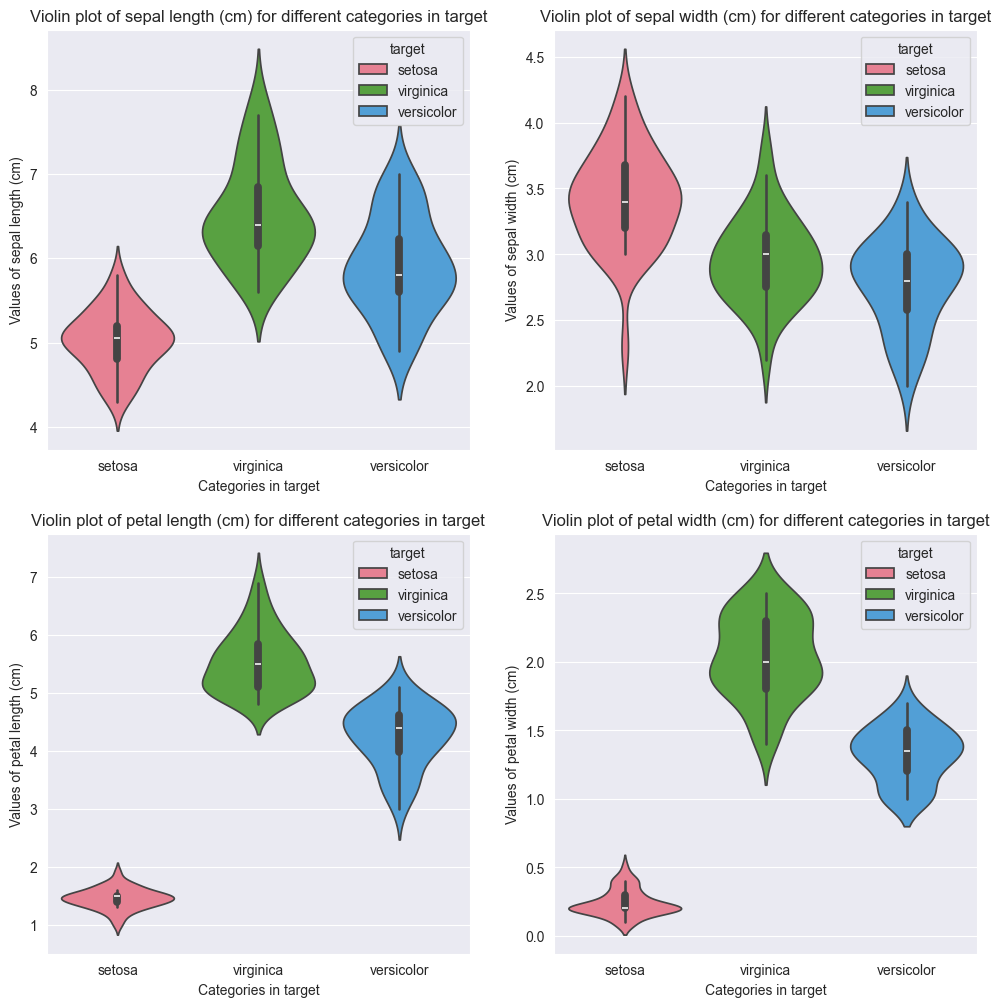

In [77]:
# Set x constant
x_const = 'target'

# Loop through first four columns in X
cols_to_plot = X.columns[:4]
num_cols = len(cols_to_plot)
num_rows = (num_cols + 1) // 2  # Number of rows needed to accommodate subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
palette = sns.color_palette("husl", len(X['target'].unique()))

for i, col in enumerate(cols_to_plot):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    sns.violinplot(x=x_const, y=col, data=X, ax=ax, hue=x_const, palette=palette, legend=True)
    ax.set_title(f'Violin plot of {col} for different categories in {x_const}')
    ax.set_xlabel(f'Categories in {x_const}')
    ax.set_ylabel(f'Values of {col}')


In [78]:
contingency_table = pd.crosstab(X['target'], pd.cut(X['sepal length (cm)'], bins=10))

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("Expected Frequencies:\n", expected)


Chi-Square Statistic: 92.26868764459223
P-value: 5.639564642208636e-12
Degrees of Freedom: 18


In [79]:

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(cramers_v)

0.6628534551991766
